In [65]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd


In [2]:
wa_puma = gpd.read_file('data/raw/tl_2017_53_puma10.shp')
df = pd.DataFrame(wa_puma)
df.head()

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,53,10200,5310200,"Skagit, Island & San Juan Counties PUMA",G6120,S,5470622131,2441658886,+48.4470835,-122.1737477,"POLYGON ((-122.44422 48.64527, -122.43685 48.6..."
1,53,10100,5310100,Whatcom County--Bellingham City PUMA,G6120,S,5459332804,1028183246,+48.8426531,-121.8364325,"POLYGON ((-122.40642 49.00230, -122.40617 49.0..."
2,53,10400,5310400,"Stevens, Okanogan, Pend Oreille & Ferry Counti...",G6120,S,29389124389,489162432,+48.5031090,-118.7866777,"POLYGON ((-118.14859 47.88667, -118.14899 47.8..."
3,53,10504,5310504,Spokane County (Outer)--Cheney City PUMA,G6120,S,3983412021,35812133,+47.5972847,-117.1210417,"POLYGON ((-117.10528 47.61018, -117.10527 47.6..."
4,53,10503,5310503,Spokane County (East Central)--Greater Spokane...,G6120,S,270926976,5004332,+47.6561281,-117.1818649,"POLYGON ((-117.15534 47.69971, -117.15509 47.6..."


In [3]:
df['PUMACE10'] = df['PUMACE10'].astype(int)

In [4]:
df[(df['PUMACE10'] >= 11601) & (df['PUMACE10'] <= 11616)];

/usr/local/anaconda3/envs/oy-env/lib/python3.7/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


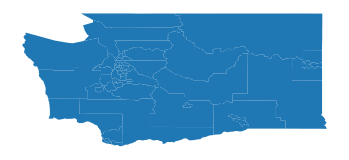

In [5]:
f, ax = plt.subplots()
ax = wa_puma.plot(axes=ax)
ax.set_axis_off()
plt.show()

In [6]:
#filtering function
def filtering_fun_by_color(x):
    filter_list = range(11601, 11615)    
    if any(x == i for i in filter_list1):
        return 'red' 
    else:
        return 'blue'

In [7]:
df['PUMA_Color'] = df['PUMACE10'].map(filtering_fun_by_color)

/usr/local/anaconda3/envs/oy-env/lib/python3.7/site-packages/geopandas/plotting.py:466: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


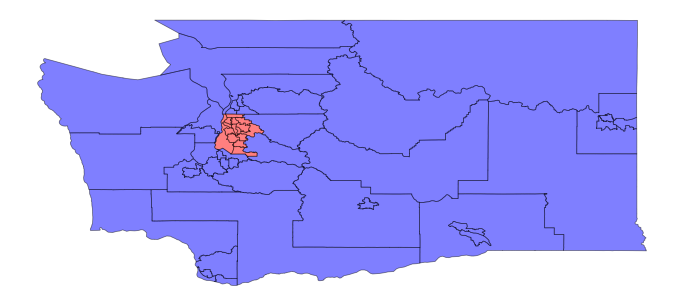

In [8]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = wa_puma.plot(axes=ax, color=df['PUMA_Color'], alpha=0.5, edgecolor='black', linewidth=.75)
ax.set_axis_off()
plt.show()

In [36]:
#filtering function
def filtering_king_co(x):  
    filter_list1 = [11612,11613,11614,11615]
    filter_list2 = list(range(11601, 11612))
    filter_list2.append(11616)    
    if any(x == i for i in filter_list1):
        return 'yellow' 
    elif any(x == i for i in filter_list2):
        return 'green'
    else:
        return 'white'

In [38]:
df['in_king_co'] = df['PUMACE10'].map(filtering_king_co)

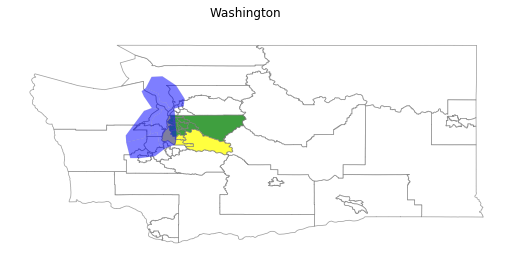

In [85]:
wa_puma = gpd.read_file('data/raw/tl_2017_53_puma10.shp')
poly = gpd.read_file('/Users/karenwarmbein/Downloads/ps_regions/ps_regions.shp')


f2, ax = plt.subplots(1, figsize=(12, 4))
ax = wa_puma.plot(ax=ax, color=df['in_king_co'], alpha=0.75, edgecolor='grey', linewidth=.75, legend=True)
ax = poly.plot(ax=ax, color='blue', alpha=0.5, edgecolor='grey', linewidth=.1)
ax.set_axis_off()
ax.autoscale_view()
f2.suptitle('Washington')
plt.show()

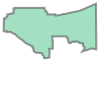

In [60]:
wa_puma.loc[4, 'geometry']

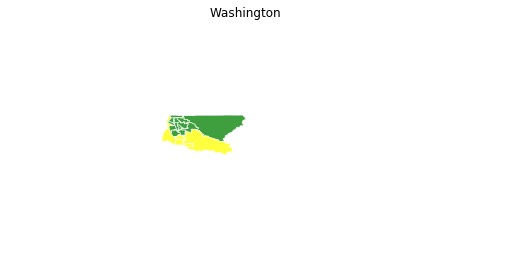

In [84]:


f, ax = plt.subplots(1, figsize=(12, 4))
ax = wa_puma.plot(ax=ax, color=df['in_king_co'], alpha=0.75, edgecolor='white', linewidth=.75, legend=True)
ax.set_axis_off()
ax.autoscale_view()
f.suptitle('Washington')
plt.show()

In [ ]:
from sqlalchemy import create_engine
import pandas as pd

#create a pointer to psql database
engine = create_engine("postgresql:///opportunity_youth")

In [ ]:
#import a psql table as a pandas DataFrame
puma_name = pd.read_sql(sql="SELECT * FROM table_final_filter;", con=engine)

In [ ]:
puma_name.head()

In [ ]:
#GIT STEPS

#1. make a branch (oy_requirement)
git checkout -b oy_requirements

#2. bundle revisions into commits
git add README.md references/PUMS_Data_Dictionary.pdf
    #add things one at a time as opposed to everything
    #add files separately
    
#3. send commits back to the cloud
#    cloud is the origin and your sending commits ob the oy_requirements branch
git push origin oy_requirements

#4. OPEN a pull request to document the merging of origin/oy_requirements in origin/master

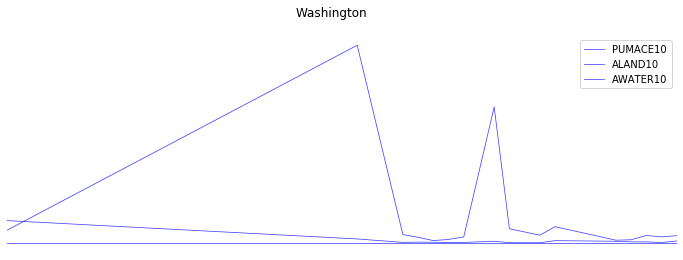

In [87]:
df_king_county = df[(df['PUMACE10'] >= 11601) & (df['PUMACE10'] <= 11616)];

f, ax = plt.subplots(1, figsize=(12, 4))
ax = df_king_county.plot(ax=ax, color='blue', alpha=0.75, linewidth=.75, legend=True)
ax.set_axis_off()
ax.autoscale_view()
f.suptitle('Washington')
plt.show()